In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
from math import log2
from IPython.display import display
%matplotlib inline

from sklearn.metrics import r2_score
from sklearn.metrics import mean_poisson_deviance
from sklearn.metrics import mean_gamma_deviance
from sklearn.metrics import median_absolute_error
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.pipeline import make_pipeline
import time
import matplotlib as mpl

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor



from sklearn.preprocessing import StandardScaler,PowerTransformer,MinMaxScaler,QuantileTransformer,normalize
from sklearn.model_selection import train_test_split, learning_curve, ShuffleSplit
from sklearn.feature_selection import VarianceThreshold, SelectKBest
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.model_selection import train_test_split

import pathlib
import os
import sys

# for selection the right path
import os,sys,inspect,pathlib
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

from common.model_trainer_reg import *

from GD.LinearRegression import LinearRegression
from KNN.KNNRegressor import KNNRegressor


In [2]:
# Custom functions

module_path = pathlib.Path(os.getcwd()).parent
if str(module_path) not in sys.path:
    sys.path.append(str(module_path))
print(sys.path)

from common.dataset_grabber import get_data_path

['/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex2', '/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex2', '/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex2', '/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex2', '/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex2/Moneyball', '', '/home/alexander/ngsuite/ngsolve-install/lib/python3/dist-packages', '/home/alexander/ngsuite/ngsolve-install/bin', '/home/alexander/.local/bin', '/usr/local/sbin', '/usr/local/bin', '/usr/sbin', '/usr/bin', '/sbin', '/bin', '/usr/games', '/usr/local/games', '/snap/bin', '/home/alexander/.vscode/extensions/ms-toolsai.jupyter-2020.11.392013122/pythonFiles', '/home/alexander/.vscode/extensions/ms-toolsai.jupyter-2020.11.392013122/pythonFiles/lib/python', '/usr/lib/python37.zip', '/usr/lib/python3.7', '/usr/lib/python3.7/lib-dynload', '/home/alexander/.local/lib/python3.7/site-packages', '/usr/local/lib/python3.7/dist-packages', '/usr/lib/python3/dist-packages

In [3]:
def plot_corr_heatmap(df, fmt=".2f", feat_to_ret="W", ticksfont=12,abs = True):
    plt.rcParams.update({'font.size': 14, 'font.weight': 'bold'})
    # Compute correlations and save in matrix
    if abs:
        corr = np.abs(df.corr()) # We only used absolute values for visualization purposes! ..."hot-cold" view to just sort between 
    else:
        corr = df.corr()

    # Mask the repeated values --> here: upper triangle

    #print(corr)
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True # mask upper triangle

    corr_to_feat = corr.loc[:,feat_to_ret]
    
    f, ax = plt.subplots(figsize=(18, 16))
    sns.heatmap(corr, annot=True, fmt=fmt , mask=mask, vmin=0, vmax=1, linewidths=.5,cmap="YlGnBu")
    plt.tick_params(labelsize=ticksfont)
    plt.savefig("out/heatmap_voting.pdf")
    return corr_to_feat

In [4]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Number of splits")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    #plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,color="r")
    #plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

    #plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    #plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.plot(train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.grid()
    return plt

In [5]:
def plot_learning_curve_test(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Number of splits")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,color="r")
    #plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.grid()
    return plt

In [6]:
def plot_learning_curve_own(y,model,ylim = None):
    plt.title("Learning_Curves")
    if ylim:
        plt.ylim(*ylim)
    plt.xlabel("Number of splits")
    plt.ylabel("score")
    plt.grid()
    plt.plot(y,marker = "o",label="Training score"+model)
    plt.legend()

In [7]:
datapath = get_data_path("Moneyball", "baseball.csv")
display(datapath)

PosixPath('/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex2/Datasets/Moneyball/baseball.csv')

In [8]:
df_raw = pd.read_csv(datapath)

df_raw

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,PHI,NL,1962,705,759,81,0.330,0.390,0.260,0,NaN,NaN,161,NaN,NaN
1228,PIT,NL,1962,706,626,93,0.321,0.394,0.268,0,NaN,NaN,161,NaN,NaN
1229,SFG,NL,1962,878,690,103,0.341,0.441,0.278,1,1.0,2.0,165,NaN,NaN
1230,STL,NL,1962,774,664,84,0.335,0.394,0.271,0,NaN,NaN,163,NaN,NaN


# Data explenarision

In [9]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Team          1232 non-null   object 
 1   League        1232 non-null   object 
 2   Year          1232 non-null   int64  
 3   RS            1232 non-null   int64  
 4   RA            1232 non-null   int64  
 5   W             1232 non-null   int64  
 6   OBP           1232 non-null   float64
 7   SLG           1232 non-null   float64
 8   BA            1232 non-null   float64
 9   Playoffs      1232 non-null   int64  
 10  RankSeason    244 non-null    float64
 11  RankPlayoffs  244 non-null    float64
 12  G             1232 non-null   int64  
 13  OOBP          420 non-null    float64
 14  OSLG          420 non-null    float64
dtypes: float64(7), int64(6), object(2)
memory usage: 144.5+ KB


In [10]:
1976 + 1624

3600

In [11]:
360000 / (1232*15)

19.48051948051948

# Description of data columns

RS ... Runs Scored, 

RA ... Runs Allowed

***RD ... Run differential (actually difference)***

W ... Wins

OBP ... On-Base Percentage

SLG ... Slugging Percentage

BA ... Batting Average

Playoffs (binary)

RankSeason

RankPlayoffs

G ... Games Played

OOBP ... Opponent On-Base Percentage

OSLG ... Opponent Slugging Percentage

In [12]:
cols_to_drop = ['Team', 'League', 'Year', 'RankSeason', 'RankPlayoffs', 'Playoffs']
df_prep = df_raw.drop(cols_to_drop, axis=1)

# Fix missing values and type
df_prep.replace("?",0, inplace=True)
#df_prep = df_prep[df_prep.OOBP != 0]
df_prep[['OOBP','OSLG']] = df_prep[['OOBP','OSLG']].astype(float)

In [13]:
df_prep

,RS,RA,W,OBP,SLG,BA,G,OOBP,OSLG
0,734,688,81,0.328,0.418,0.259,162,0.317,0.415
1,700,600,94,0.320,0.389,0.247,162,0.306,0.378
2,712,705,93,0.311,0.417,0.247,162,0.315,0.403
3,734,806,69,0.315,0.415,0.260,162,0.331,0.428
4,613,759,61,0.302,0.378,0.240,162,0.335,0.424
...,...,...,...,...,...,...,...,...,...
1227,705,759,81,0.330,0.390,0.260,161,NaN,NaN
1228,706,626,93,0.321,0.394,0.268,161,NaN,NaN
1229,878,690,103,0.341,0.441,0.278,165,NaN,NaN
1230,774,664,84,0.335,0.394,0.271,163,NaN,NaN


# Handling missingvalues

420 Nan values are in the OOBP and OSLG column.

1) Stategie is to drop these rows with the Nan values. The impact of this stategie is that the dataset shrinks.

2) calculate the mean value from all other values in the column and replace it with it.

In [14]:
r_mean = np.mean(df_prep["OOBP"])
print(r_mean)
df_prep_mean = df_prep.replace(float('NaN'),r_mean)
r_mean = np.mean(df_prep["OSLG"])
print(r_mean)
df_prep_mean  = df_prep_mean.replace(float('NaN'),r_mean)

0.3322642857142857
0.41974285714285714


In [15]:
df_prep_mean

,RS,RA,W,OBP,SLG,BA,G,OOBP,OSLG
0,734,688,81,0.328,0.418,0.259,162,0.317000,0.415000
1,700,600,94,0.320,0.389,0.247,162,0.306000,0.378000
2,712,705,93,0.311,0.417,0.247,162,0.315000,0.403000
3,734,806,69,0.315,0.415,0.260,162,0.331000,0.428000
4,613,759,61,0.302,0.378,0.240,162,0.335000,0.424000
...,...,...,...,...,...,...,...,...,...
1227,705,759,81,0.330,0.390,0.260,161,0.332264,0.332264
1228,706,626,93,0.321,0.394,0.268,161,0.332264,0.332264
1229,878,690,103,0.341,0.441,0.278,165,0.332264,0.332264
1230,774,664,84,0.335,0.394,0.271,163,0.332264,0.332264


In [16]:
df_prep_nomiss = df_prep.dropna()
df_prep_nomiss

,RS,RA,W,OBP,SLG,BA,G,OOBP,OSLG
0,734,688,81,0.328,0.418,0.259,162,0.317,0.415
1,700,600,94,0.320,0.389,0.247,162,0.306,0.378
2,712,705,93,0.311,0.417,0.247,162,0.315,0.403
3,734,806,69,0.315,0.415,0.260,162,0.331,0.428
4,613,759,61,0.302,0.378,0.240,162,0.335,0.424
...,...,...,...,...,...,...,...,...,...
415,872,831,86,0.356,0.434,0.271,162,0.345,0.423
416,809,838,75,0.338,0.426,0.262,161,0.355,0.427
417,772,913,69,0.343,0.411,0.274,162,0.371,0.448
418,945,859,95,0.361,0.479,0.293,162,0.346,0.459


# Distributions from the taget-clomum

In [17]:
np.mean(df_prep_nomiss["W"])

80.95714285714286

80.95714285714286


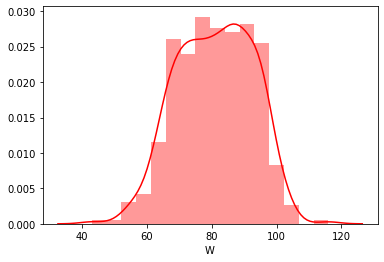

In [18]:
print(np.mean(df_prep_nomiss["W"]))
plot = sns.distplot(df_prep_nomiss["W"], color="red")
plt.savefig("out/explornation/nomiss.png")

80.90422077922078


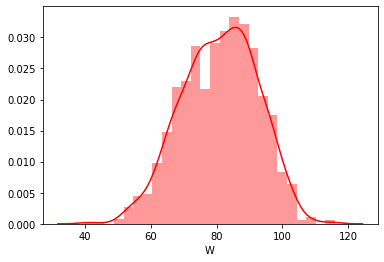

In [19]:
print(np.mean(df_prep_mean["W"]))
sns.distplot(df_prep_mean["W"], color="red")
plt.savefig("out/explornation/mean.png")

almoast looks like a distribution -> indicates a good regression

# Train and Test

In [20]:
#Y = df_prep_mean[['W']]   # does not work with TrainTestSplit and CrossValidation
# works if the parameter is a pandas.core.series.Series
Y = df_prep_mean["W"]
print(type(Y))

#Y = df_prep_mean.W
#print(type(Y))
X = df_prep_mean[["RS","RA","OBP","SLG","BA","G","OOBP","OSLG"]]

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)



<class 'pandas.core.series.Series'>


In [21]:
#x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.4, random_state = 42)
#MODEL = SGDRegressor()
#train_sizes, train_scores, test_scores, fit_times = learning_curve(MODEL, x_train, y_train, return_times=True, train_sizes=train_sizes)

In [22]:
#cv = train_test_split(X, Y, test_size = 0.4, random_state = 42)
#train_sizes, train_scores = learning_curve(MODEL, X, Y)

## shuffle split

In [23]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

clf = SGDRegressor()
n_samples = X.shape[0]
#cv = ShuffleSplit(n_splits=2, test_size=0.4, random_state=42)
#cross_val_score(clf, X, Y, cv=cv)

rs = ShuffleSplit(n_splits=10, test_size=.25, random_state=0)
rs.get_n_splits(X)

print(rs)
x_train = 0
x_test = 0
y_test = 0
y_train = 0
tmp = 0

for train_index, test_index in rs.split(X):
    #if(x_train == tmp):
    #    print("Hallo")
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    #tmp = x_train


    #print(len(x_train))
    #print(len(x_test))
    #print("TRAIN:", train_index, "TEST:", test_index)
    #print(" ")
    #print(" ")
    #print(" ")

    #print(" ")
    #print(" ")

ShuffleSplit(n_splits=10, random_state=0, test_size=0.25, train_size=None)


## SGD-Regression

In [24]:
MODEL = SGDRegressor
NAME = "SGD"
PATH = "out/"+NAME+"/"
params = {"alpha" : [0.0001]}
n_splits = 10

modeltrainer = ModelTrainer(MODEL, params, X, Y, Varerror=mean_gamma_deviance, Error="MGE")
########### train with TrainTestSplit  ###################
modeltrainer.TTSplit(perc = 0.4)
modeltrainer.train()
res = modeltrainer.result
display(res)


########### k-Fold Cross validation  ###################
modeltrainer.CV_fold(k = n_splits, test_size = 0.4, random_state = 42)
modeltrainer.train()
res = modeltrainer.result
display(res)

########### shuffle_Cross validation  ###################
score_list_SGD = modeltrainer.CV_shuffle_split(k = n_splits, test_size = 0.4, random_state = 42)
modeltrainer.train()
res = modeltrainer.result
display(res)

('alpha',) ([0.0001],)
Finished evaluation
R2_score= 0.8800659193488781
Total evaluation time = 0.19s


,alpha,train_time,inference_time,R2_score,RMSE,MGE
0,0.0001,0.005387,0.000299,0.880066,16.202262,0.002794


('alpha',) ([0.0001],)
Finished evaluation
R2_score= 0.8656321136601698
Total evaluation time = 0.17s


,alpha,train_time,inference_time,R2_score,RMSE,MGE
0,0.0001,0.006011,0.000263,0.865632,17.183636,0.002809


('alpha',) ([0.0001],)
Finished evaluation
R2_score= 0.8800659193488781
Total evaluation time = 0.17s
('alpha',) ([0.0001],)
Finished evaluation
R2_score= 0.859794339463481
Total evaluation time = 0.16s
('alpha',) ([0.0001],)
Finished evaluation
R2_score= 0.8759209782319151
Total evaluation time = 0.16s
('alpha',) ([0.0001],)
Finished evaluation
R2_score= 0.8884728855716328
Total evaluation time = 0.21s
('alpha',) ([0.0001],)
Finished evaluation
R2_score= 0.8702653564444965
Total evaluation time = 0.17s
('alpha',) ([0.0001],)
Finished evaluation
R2_score= 0.8824565886871505
Total evaluation time = 0.17s
('alpha',) ([0.0001],)
Finished evaluation
R2_score= 0.8921091578530822
Total evaluation time = 0.17s
('alpha',) ([0.0001],)
Finished evaluation
R2_score= 0.8643012937674381
Total evaluation time = 0.16s
('alpha',) ([0.0001],)
Finished evaluation
R2_score= 0.8799763627402091
Total evaluation time = 0.17s
('alpha',) ([0.0001],)
Finished evaluation
R2_score= 0.8656321136601698
Total evalu

,alpha,train_time,inference_time,R2_score,RMSE,MGE
0,0.0001,0.005251,0.000238,0.865632,17.183636,0.002809


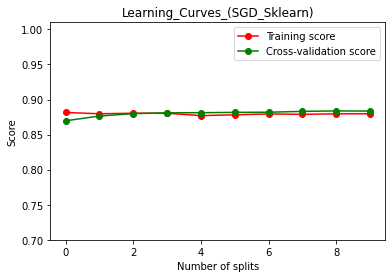

In [25]:
plt.figure()
plt.grid()
title = "Learning_Curves_(SGD_Sklearn)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=n_splits, test_size=0.2, random_state=0)

estimator = SGDRegressor()
plot_learning_curve(estimator, title, X, Y, ylim=(0.7, 1.01), cv=cv, n_jobs=4,train_sizes=np.linspace(.1, 1.0, n_splits))
plt.savefig(PATH+title)
plt.show()

In [26]:
MODEL = LinearRegression
params = {"alpha" : [0.0001,0.00001, 0.000001],
         "max_iter": [1000,10000,100000], 
         "weigths": ["residual"]}


modeltrainer = ModelTrainer(MODEL, params, X, Y, Varerror=mean_gamma_deviance, Error="MGE")
########### train with TrainTestSplit  ###################
modeltrainer.TTSplit(perc = 0.4)
modeltrainer.train()
res = modeltrainer.result
display(res)


########### k-Fold Cross validation  ###################
modeltrainer.CV_fold(k = n_splits, test_size = 0.4, random_state = 42)
modeltrainer.train()
res = modeltrainer.result
display(res)

########### shuffle_Cross validation  ###################
score_list_SGD_own = modeltrainer.CV_shuffle_split(k = n_splits, test_size = 0.4, random_state = 42)
modeltrainer.train()
res = modeltrainer.result
display(res)

('alpha', 'max_iter', 'weigths') ([0.0001, 1e-05, 1e-06], [1000, 10000, 100000], ['residual'])
Finished evaluation
R2_score= 0.2940855685586907
Total evaluation time = 2.70s


,alpha,max_iter,weigths,train_time,inference_time,R2_score,RMSE,MGE
0,0.000100,1000,residual,0.110730,0.040183,0.294086,95.364143,0.015551
1,0.000100,10000,residual,0.614523,0.018231,0.294086,95.364143,0.015551
2,0.000100,100000,residual,2.538296,0.010848,0.294086,95.364143,0.015551
3,0.000010,1000,residual,0.106182,0.057579,0.294086,95.364149,0.015551
4,0.000010,10000,residual,0.561455,0.020564,0.294086,95.364143,0.015551
5,0.000010,100000,residual,2.433134,0.012124,0.294086,95.364143,0.015551
6,0.000001,1000,residual,0.067860,0.019597,0.282185,96.971775,0.015731
7,0.000001,10000,residual,0.610034,0.018573,0.294086,95.364150,0.015551
8,0.000001,100000,residual,1.764022,0.012606,0.294086,95.364143,0.015551


('alpha', 'max_iter', 'weigths') ([0.0001, 1e-05, 1e-06], [1000, 10000, 100000], ['residual'])
Finished evaluation
R2_score= 0.30203873425758465
Total evaluation time = 2.68s


,alpha,max_iter,weigths,train_time,inference_time,R2_score,RMSE,MGE
0,0.000100,1000,residual,0.080859,0.034499,0.302039,89.258773,0.014499
1,0.000100,10000,residual,0.587152,0.026759,0.302039,89.258773,0.014499
2,0.000100,100000,residual,2.537022,0.011870,0.302039,89.258773,0.014499
3,0.000010,1000,residual,0.084966,0.023666,0.302039,89.258777,0.014499
4,0.000010,10000,residual,0.608045,0.019073,0.302039,89.258773,0.014499
5,0.000010,100000,residual,2.462813,0.012182,0.302039,89.258773,0.014499
6,0.000001,1000,residual,0.146969,0.046404,0.293383,90.365739,0.014699
7,0.000001,10000,residual,0.555199,0.032237,0.302039,89.258777,0.014499
8,0.000001,100000,residual,1.825044,0.013058,0.302039,89.258773,0.014499


('alpha', 'max_iter', 'weigths') ([0.0001, 1e-05, 1e-06], [1000, 10000, 100000], ['residual'])
Finished evaluation
R2_score= 0.2940855685586907
Total evaluation time = 2.67s
('alpha', 'max_iter', 'weigths') ([0.0001, 1e-05, 1e-06], [1000, 10000, 100000], ['residual'])
Finished evaluation
R2_score= 0.3044814249848655
Total evaluation time = 2.68s
('alpha', 'max_iter', 'weigths') ([0.0001, 1e-05, 1e-06], [1000, 10000, 100000], ['residual'])
Finished evaluation
R2_score= 0.29814824725331335
Total evaluation time = 2.68s
('alpha', 'max_iter', 'weigths') ([0.0001, 1e-05, 1e-06], [1000, 10000, 100000], ['residual'])
Finished evaluation
R2_score= 0.2874306268730209
Total evaluation time = 2.78s
('alpha', 'max_iter', 'weigths') ([0.0001, 1e-05, 1e-06], [1000, 10000, 100000], ['residual'])
Finished evaluation
R2_score= 0.28904537660499985
Total evaluation time = 2.68s
('alpha', 'max_iter', 'weigths') ([0.0001, 1e-05, 1e-06], [1000, 10000, 100000], ['residual'])
Finished evaluation
R2_score= 0.2

,alpha,max_iter,weigths,train_time,inference_time,R2_score,RMSE,MGE
0,0.000100,1000,residual,0.087545,0.058917,0.302039,89.258773,0.014499
1,0.000100,10000,residual,0.392294,0.048496,0.302039,89.258773,0.014499
2,0.000100,100000,residual,2.145481,0.013278,0.302039,89.258773,0.014499
3,0.000010,1000,residual,0.079708,0.057495,0.302039,89.258777,0.014499
4,0.000010,10000,residual,0.499659,0.019232,0.302039,89.258773,0.014499
5,0.000010,100000,residual,2.638470,0.010771,0.302039,89.258773,0.014499
6,0.000001,1000,residual,0.064163,0.024563,0.293383,90.365739,0.014699
7,0.000001,10000,residual,0.458166,0.019501,0.302039,89.258777,0.014499
8,0.000001,100000,residual,2.206807,0.010528,0.302039,89.258773,0.014499


## KNN-Regression

In [27]:
MODEL = KNeighborsRegressor
params = {"n_neighbors": [5],
        "weights" : ["uniform"],
        "algorithm": ["brute","kd_tree","ball_tree"]}
NAME = "KNN"
PATH = "out/"+NAME+"/"


modeltrainer = ModelTrainer(MODEL, params, X, Y, Varerror=mean_gamma_deviance, Error="MGE")
########### train with TrainTestSplit  ###################
modeltrainer.TTSplit(perc = 0.4)
modeltrainer.train()
res = modeltrainer.result
display(res)


########### k-Fold Cross validation  ###################
modeltrainer.CV_fold(k = n_splits, test_size = 0.4, random_state = 42)
modeltrainer.train()
res = modeltrainer.result
display(res)

########### shuffle_Cross validation  ###################
score_list_KNN = modeltrainer.CV_shuffle_split(k = n_splits, test_size = 0.4, random_state = 42)
modeltrainer.train()
res = modeltrainer.result
display(res)

('n_neighbors', 'weights', 'algorithm') ([5], ['uniform'], ['brute', 'kd_tree', 'ball_tree'])
Finished evaluation
R2_score= 0.7801506537353666
Total evaluation time = 0.20s


,n_neighbors,weights,algorithm,train_time,inference_time,R2_score,RMSE,MGE
0,5,uniform,brute,0.001556,0.044980,0.780151,29.700122,0.005052
1,5,uniform,kd_tree,0.003358,0.011022,0.780151,29.700122,0.005052
2,5,uniform,ball_tree,0.003990,0.012835,0.780151,29.700122,0.005052


('n_neighbors', 'weights', 'algorithm') ([5], ['uniform'], ['brute', 'kd_tree', 'ball_tree'])
Finished evaluation
R2_score= 0.7836259519881399
Total evaluation time = 0.17s


,n_neighbors,weights,algorithm,train_time,inference_time,R2_score,RMSE,MGE
0,5,uniform,brute,0.001326,0.028628,0.783626,27.670994,0.004611
1,5,uniform,kd_tree,0.006955,0.019234,0.783626,27.670994,0.004611
2,5,uniform,ball_tree,0.002640,0.014040,0.783626,27.670994,0.004611


('n_neighbors', 'weights', 'algorithm') ([5], ['uniform'], ['brute', 'kd_tree', 'ball_tree'])
Finished evaluation
R2_score= 0.7801506537353666
Total evaluation time = 0.20s
('n_neighbors', 'weights', 'algorithm') ([5], ['uniform'], ['brute', 'kd_tree', 'ball_tree'])
Finished evaluation
R2_score= 0.7675499709614795
Total evaluation time = 0.18s
('n_neighbors', 'weights', 'algorithm') ([5], ['uniform'], ['brute', 'kd_tree', 'ball_tree'])
Finished evaluation
R2_score= 0.7752385717027952
Total evaluation time = 0.17s
('n_neighbors', 'weights', 'algorithm') ([5], ['uniform'], ['brute', 'kd_tree', 'ball_tree'])
Finished evaluation
R2_score= 0.794045454362234
Total evaluation time = 0.17s
('n_neighbors', 'weights', 'algorithm') ([5], ['uniform'], ['brute', 'kd_tree', 'ball_tree'])
Finished evaluation
R2_score= 0.7614950522137072
Total evaluation time = 0.19s
('n_neighbors', 'weights', 'algorithm') ([5], ['uniform'], ['brute', 'kd_tree', 'ball_tree'])
Finished evaluation
R2_score= 0.7950093478

,n_neighbors,weights,algorithm,train_time,inference_time,R2_score,RMSE,MGE
0,5,uniform,brute,0.001343,0.029323,0.783626,27.670994,0.004611
1,5,uniform,kd_tree,0.002744,0.010211,0.783626,27.670994,0.004611
2,5,uniform,ball_tree,0.002533,0.010414,0.783626,27.670994,0.004611


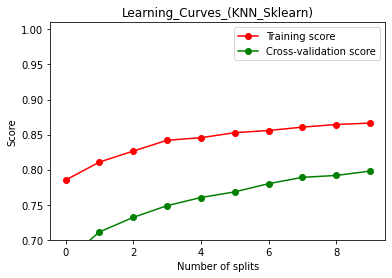

In [28]:
plt.figure()
plt.grid()

title = "Learning_Curves_(KNN_Sklearn)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
#cv = train_test_split(test_size=0.4, random_state=42)

estimator = KNeighborsRegressor()
plot_learning_curve(estimator, title, X, Y, ylim=(0.7, 1.01), cv=cv, n_jobs=4,train_sizes=np.linspace(.1, 1.0, n_splits))
plt.savefig(PATH+title)
plt.show()

In [29]:
MODEL = KNNRegressor
params = {"n_neighbors" : [5],
           "p": [2]}
           #"weights": ["uniform"]}
NAME = "KNN"
PATH = "out/"+NAME+"/"


modeltrainer = ModelTrainer(MODEL, params, X, Y, Varerror=mean_gamma_deviance, Error="MGE")
########### train with TrainTestSplit  ###################
modeltrainer.TTSplit(perc = 0.4)
modeltrainer.train()
res = modeltrainer.result
display(res)


########### k-Fold Cross validation  ###################
modeltrainer.CV_fold(k = n_splits, test_size = 0.4, random_state = 42)
modeltrainer.train()
res = modeltrainer.result
display(res)

########### shuffle_Cross validation  ###################
score_list_KNN_own = modeltrainer.CV_shuffle_split(k = n_splits, test_size = 0.4, random_state = 42)
modeltrainer.train()
res = modeltrainer.result
display(res)

('n_neighbors', 'p') ([5], [2])
Finished evaluation
R2_score= 0.7801506537353666
Total evaluation time = 0.18s


,n_neighbors,p,train_time,inference_time,R2_score,RMSE,MGE
0,5,2,0.000028,0.045515,0.780151,29.700122,0.005052


('n_neighbors', 'p') ([5], [2])
Finished evaluation
R2_score= 0.7836259519881399
Total evaluation time = 0.18s


,n_neighbors,p,train_time,inference_time,R2_score,RMSE,MGE
0,5,2,0.000022,0.05202,0.783626,27.670994,0.004611


('n_neighbors', 'p') ([5], [2])
Finished evaluation
R2_score= 0.7801506537353666
Total evaluation time = 0.18s
('n_neighbors', 'p') ([5], [2])
Finished evaluation
R2_score= 0.7675499709614795
Total evaluation time = 0.17s
('n_neighbors', 'p') ([5], [2])
Finished evaluation
R2_score= 0.7752385717027952
Total evaluation time = 0.17s
('n_neighbors', 'p') ([5], [2])
Finished evaluation
R2_score= 0.794045454362234
Total evaluation time = 0.17s
('n_neighbors', 'p') ([5], [2])
Finished evaluation
R2_score= 0.7614950522137072
Total evaluation time = 0.17s
('n_neighbors', 'p') ([5], [2])
Finished evaluation
R2_score= 0.7950093478438607
Total evaluation time = 0.17s
('n_neighbors', 'p') ([5], [2])
Finished evaluation
R2_score= 0.8077586725747223
Total evaluation time = 0.17s
('n_neighbors', 'p') ([5], [2])
Finished evaluation
R2_score= 0.7714844598897976
Total evaluation time = 0.17s
('n_neighbors', 'p') ([5], [2])
Finished evaluation
R2_score= 0.8028573916427195
Total evaluation time = 0.17s
('

,n_neighbors,p,train_time,inference_time,R2_score,RMSE,MGE
0,5,2,0.000022,0.036836,0.783626,27.670994,0.004611


## RF-Regression

In [30]:
MODEL = RandomForestRegressor
params = {"n_estimators" : [100]}
NAME = "RF"
PATH = "out/"+NAME+"/"


modeltrainer = ModelTrainer(MODEL, params, X, Y, Varerror=mean_gamma_deviance, Error="MGE")
########### train with TrainTestSplit  ###################
modeltrainer.TTSplit(perc = 0.4)
modeltrainer.train()
res = modeltrainer.result
display(res)


########### k-Fold Cross validation  ###################
modeltrainer.CV_fold(k = n_splits, test_size = 0.4, random_state = 42)
modeltrainer.train()
res = modeltrainer.result
display(res)

########### shuffle_Cross validation  ###################
score_list_RF = modeltrainer.CV_shuffle_split(k = n_splits, test_size = 0.4, random_state = 42)
modeltrainer.train()
res = modeltrainer.result
display(res)

('n_estimators',) ([100],)
Finished evaluation
R2_score= 0.8525960339839206
Total evaluation time = 0.48s


,n_estimators,train_time,inference_time,R2_score,RMSE,MGE
0,100,0.337158,0.013708,0.852596,19.913253,0.003326


('n_estimators',) ([100],)
Finished evaluation
R2_score= 0.8434562725015379
Total evaluation time = 0.48s


,n_estimators,train_time,inference_time,R2_score,RMSE,MGE
0,100,0.32791,0.013026,0.843456,20.019594,0.003257


('n_estimators',) ([100],)
Finished evaluation
R2_score= 0.8525960339839206
Total evaluation time = 0.47s
('n_estimators',) ([100],)
Finished evaluation
R2_score= 0.8293379649582755
Total evaluation time = 0.47s
('n_estimators',) ([100],)
Finished evaluation
R2_score= 0.8456262947201324
Total evaluation time = 0.47s
('n_estimators',) ([100],)
Finished evaluation
R2_score= 0.856125396795214
Total evaluation time = 0.47s
('n_estimators',) ([100],)
Finished evaluation
R2_score= 0.8382676220497823
Total evaluation time = 0.47s
('n_estimators',) ([100],)
Finished evaluation
R2_score= 0.8606390243294924
Total evaluation time = 0.47s
('n_estimators',) ([100],)
Finished evaluation
R2_score= 0.8589212538534748
Total evaluation time = 0.47s
('n_estimators',) ([100],)
Finished evaluation
R2_score= 0.82001734369097
Total evaluation time = 0.48s
('n_estimators',) ([100],)
Finished evaluation
R2_score= 0.8511241713713336
Total evaluation time = 0.47s
('n_estimators',) ([100],)
Finished evaluation
R2

,n_estimators,train_time,inference_time,R2_score,RMSE,MGE
0,100,0.305579,0.014056,0.843456,20.019594,0.003257


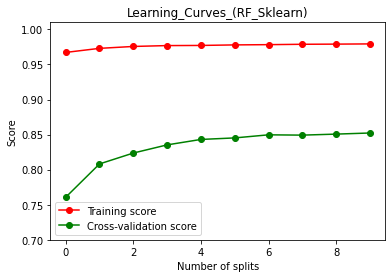

In [31]:
plt.figure()
plt.grid()

title = "Learning_Curves_(RF_Sklearn)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
#cv = train_test_split(test_size=0.4, random_state=42)

estimator = RandomForestRegressor()
plot_learning_curve(estimator, title, X, Y, ylim=(0.7, 1.01), cv=cv, n_jobs=4,train_sizes=np.linspace(.1, 1.0, n_splits))
plt.savefig(PATH+title)
plt.show()

## DT-Regression

In [32]:
MODEL = DecisionTreeRegressor
params = {"criterion": ["mse"]}
NAME = "DT"
PATH = "out/"+NAME+"/"


modeltrainer = ModelTrainer(MODEL, params, X, Y, Varerror=mean_gamma_deviance, Error="MGE")
########### train with TrainTestSplit  ###################
modeltrainer.TTSplit(perc = 0.4)
modeltrainer.train()
res = modeltrainer.result
display(res)


########### k-Fold Cross validation  ###################
modeltrainer.CV_fold(k = n_splits, test_size = 0.4, random_state = 42)
modeltrainer.train()
res = modeltrainer.result
display(res)

########### shuffle_Cross validation  ###################
score_list_DT = modeltrainer.CV_shuffle_split(k = n_splits, test_size = 0.4, random_state = 42)
modeltrainer.train()
res = modeltrainer.result
display(res)

('criterion',) (['mse'],)
Finished evaluation
R2_score= 0.7222709383139561
Total evaluation time = 0.17s


,criterion,train_time,inference_time,R2_score,RMSE,MGE
0,mse,0.008017,0.000353,0.722271,37.51927,0.006195


('criterion',) (['mse'],)
Finished evaluation
R2_score= 0.6859818057339349
Total evaluation time = 0.18s


,criterion,train_time,inference_time,R2_score,RMSE,MGE
0,mse,0.00429,0.000302,0.685982,40.158215,0.006584


('criterion',) (['mse'],)
Finished evaluation
R2_score= 0.7222709383139561
Total evaluation time = 0.17s
('criterion',) (['mse'],)
Finished evaluation
R2_score= 0.7061426675766119
Total evaluation time = 0.17s
('criterion',) (['mse'],)
Finished evaluation
R2_score= 0.7201690974511327
Total evaluation time = 0.17s
('criterion',) (['mse'],)
Finished evaluation
R2_score= 0.7140000202126877
Total evaluation time = 0.17s
('criterion',) (['mse'],)
Finished evaluation
R2_score= 0.7474667241863482
Total evaluation time = 0.17s
('criterion',) (['mse'],)
Finished evaluation
R2_score= 0.7452193152858066
Total evaluation time = 0.18s
('criterion',) (['mse'],)
Finished evaluation
R2_score= 0.7027116385116979
Total evaluation time = 0.17s
('criterion',) (['mse'],)
Finished evaluation
R2_score= 0.6838143057921833
Total evaluation time = 0.17s
('criterion',) (['mse'],)
Finished evaluation
R2_score= 0.7307799958606278
Total evaluation time = 0.17s
('criterion',) (['mse'],)
Finished evaluation
R2_score=

,criterion,train_time,inference_time,R2_score,RMSE,MGE
0,mse,0.004155,0.000308,0.685982,40.158215,0.006584


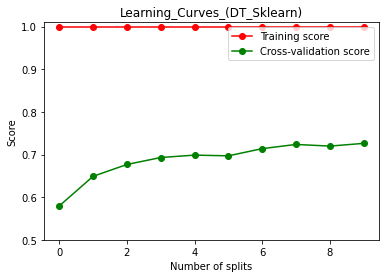

In [33]:
plt.figure()
plt.grid()

title = "Learning_Curves_(DT_Sklearn)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
#cv = train_test_split(test_size=0.4, random_state=42)

estimator = DecisionTreeRegressor()
plot_learning_curve(estimator, title, X, Y, ylim=(0.5, 1.01), cv=cv, n_jobs=4,train_sizes=np.linspace(.1, 1.0, n_splits))
plt.savefig(PATH+title)
plt.show()

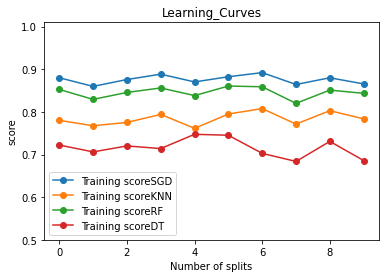

In [34]:
plot_learning_curve_own(score_list_SGD,"SGD", ylim=(0.5, 1.01))
plot_learning_curve_own(score_list_KNN,"KNN")
plot_learning_curve_own(score_list_RF,"RF")
plot_learning_curve_own(score_list_DT,"DT")
plt.savefig("out/shuffle_vs_score")

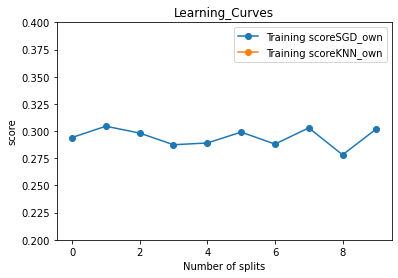

In [35]:
plot_learning_curve_own(score_list_SGD_own,"SGD_own", ylim=(0.2, 0.4))
plot_learning_curve_own(score_list_KNN_own,"KNN_own")
plt.savefig("out/shuffle_own_vs_score")

In [36]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_poisson_deviance
from sklearn.metrics import mean_gamma_deviance
from sklearn.metrics import median_absolute_error

In [37]:
tup = (r2_score, mean_poisson_deviance, mean_gamma_deviance, median_absolute_error)

In [38]:
tup[0]([1,1,1,1],[1,1,1,1])

1.0

In [39]:
r2_score([1,1,1,1],[1,1,1,1])

1.0